<a href="https://colab.research.google.com/github/hashmiabrar1/Deep-Learning-Hands-on/blob/main/Image_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Input is an image, output are probabilities.

ResNet is a famous CNN Architecture.
Transfer learning can be of great importance for pre-trained models

CNN has two kinds of layers-
1) Convolution- Local receptive field
2) Pooling- Subsampling of Inputs



The matrix has 26 pixels, each containing suppose RGB values. The kernel containing 1s and 0s is slid over it->
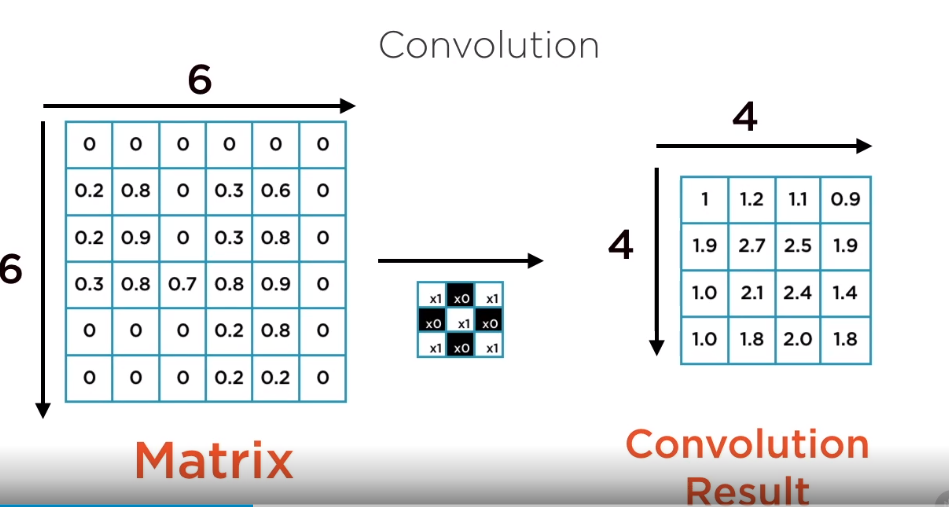

Horizontal and vertical strides are the no. of horizontal and vertical moves the kernel makes-

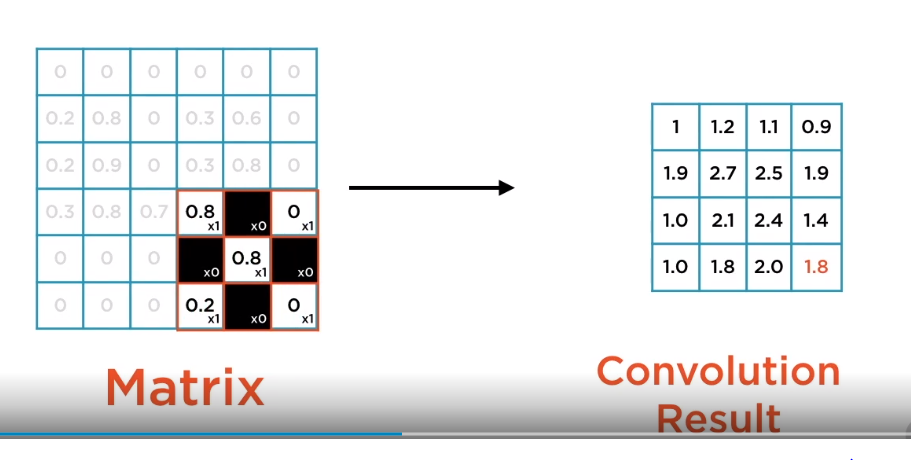



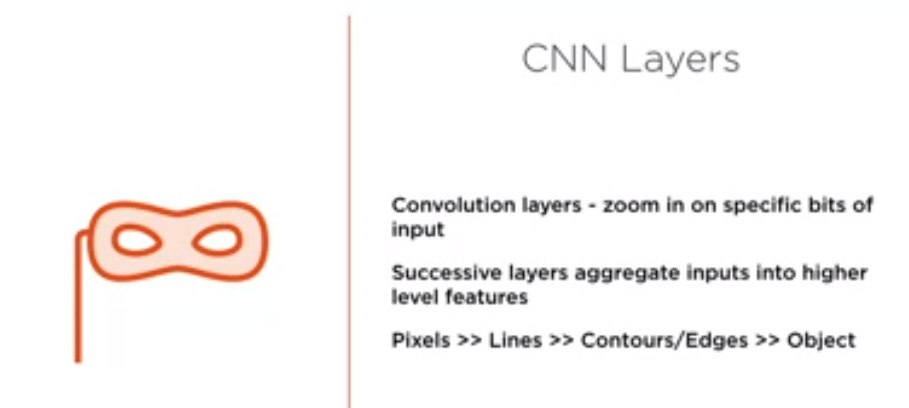

We have images. Images are made of pixels.
Feature maps are convolutional layers generated by applying a convolutional kernel to the input
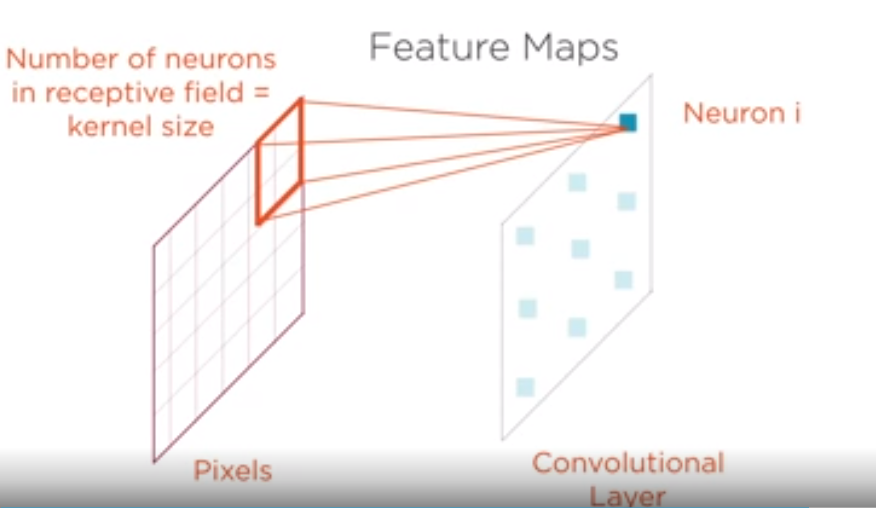

Neurons are not connected to all pixels.
CNN's are sparse neural networks.
Each convolution layer consists of several feature maps of equal sizes. The different feature maps have different parameters.

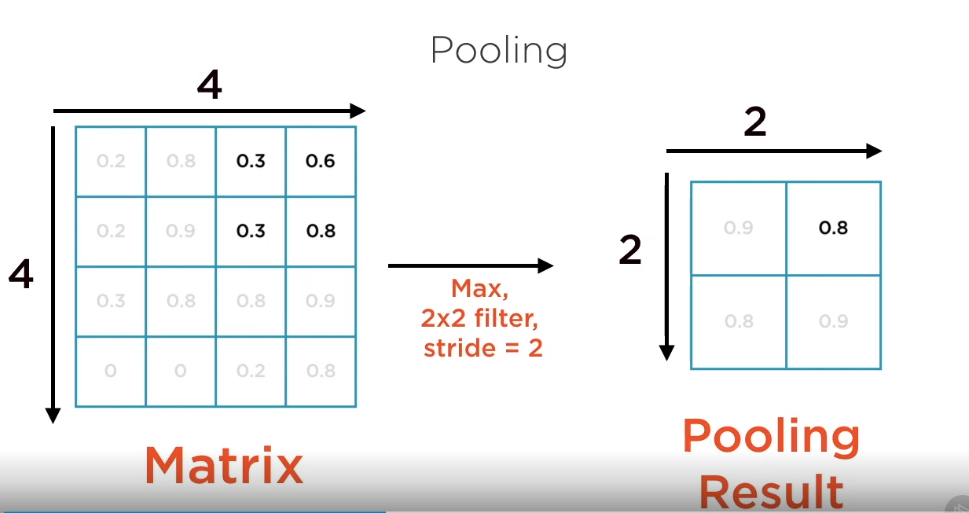

Stride=2 means to move the kernel by two cells.

Neurons in a pooling layer have no weights or biases.
A pooling neuron simply applies some aggregation function to all inputs
eg- max, sum, average
Pooling reduces memory usage during training.
Reduces overfitting(by subsampling). Helps us extract the most important features.
Makes NN recognize features independent of location(location invariance)

TYPICAL CNN ARCHITECTURE-
Alternating groups of Convolutional and Pooling layers.
Each group of convolution layer is usually followed by a RELU layer.

Convolutional layer extracts more and more features.
Pooling layer o/p is reduced/aggregate.

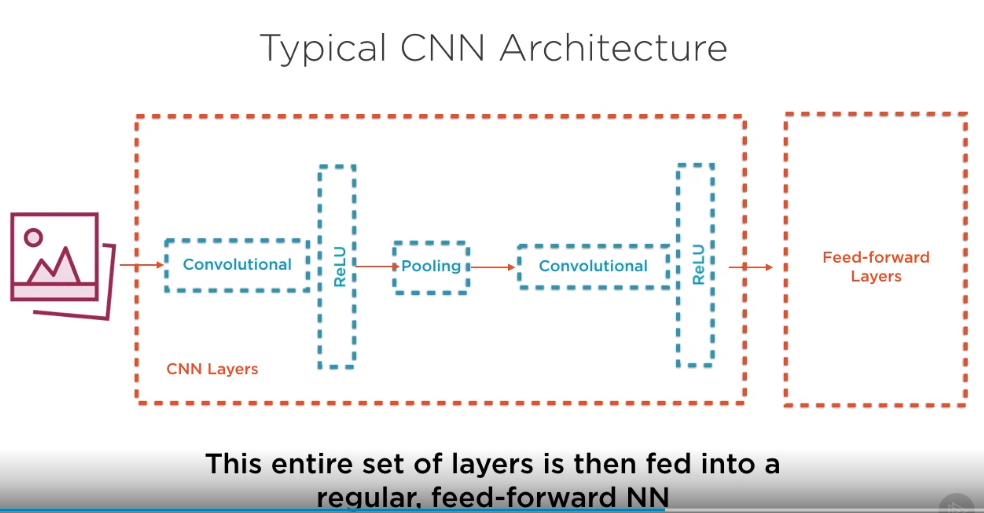

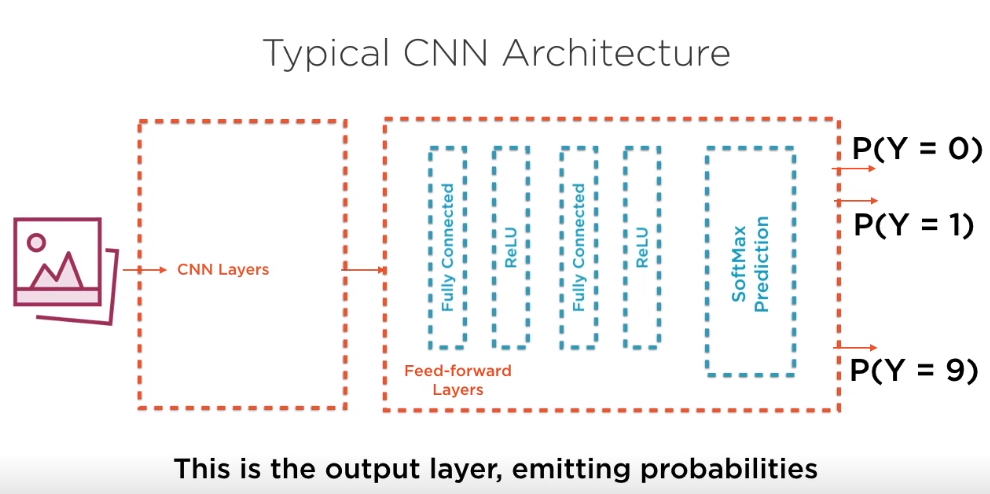

Batch Normalization-

Back propagation fails if-
Gradients are vanishing or
Gradients are exploding

Coping with vanishing and exploding gradients-
1) Proper initialization
2) Batch Normalization
3) Non saturating Activation Function
4) Gradient Clipping

NN work better if we apply batch normalization before applying activation function.
First normalize inputs-
-Subtract mean
-Divide by standard deviation

Second Scale and Shift inputs-
Scale- Multiply by Constant
Shift- Add Constant


In [ ]:
#Building a CNN to classify images from the CIFAR-10 dataset
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
#Traaining dataset
trainset= torchvision.datasets.CIFAR10(root='./datasets', train=True, download=True, transform=transforms.ToTensor())

KeyboardInterrupt: ignored

In [ ]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
#Every batch has 8 images. Using 2 sub-processes for data loading.
trainloader=torch.utils.data.DataLoader(trainset, 
                                        batch_size=8, 
                                        shuffle=True, 
                                        num_workers=2)

In [ ]:
#Test Dataset
testset=torchvision.datasets.CIFAR10(root='./datasets',
                                     train=False,
                                     download=True,
                                     transform=transforms.ToTensor())
testset

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./datasets
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
testloader=torch.utils.data.DataLoader(testset,
                                       batch_size=8,
                                       shuffle=False,
                                       num_workers=2)
#Here no need to randomize

In [ ]:
labels= ['plane','car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Using tuple

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
images_batch, labels_batch = iter(trainloader).next()

In [ ]:
images_batch.shape
#Batch size-8, Channels-3, each image- 32*32 pixels

torch.Size([8, 3, 32, 32])

In [ ]:
#Placing the 8 images side by side, 2 pixel padding between images and the edges of the grid.
img= torchvision.utils.make_grid(images_batch)

In [ ]:
img.shape
#3 channels, height is 36 and width is 274

torch.Size([3, 36, 274])

In [ ]:
#Below in transpose we give(1,2,0) that means take 1th first, 2nd second and 0th third from img.
np.transpose(img, (1,2,0)).shape

torch.Size([36, 274, 3])

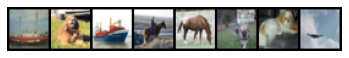

In [ ]:
#To view image, matplotlib requires it to be in the 3rd dimension
plt.imshow(np.transpose(img, (1,2,0)))
plt.axis('off')
plt.show()

In [ ]:
import torch.nn as nn

In [ ]:
in_size=3             #No of channels in the input layer- RGB so 3
hid1_size= 16         #No of channels o/p by first convolution layer
hid2_size= 32         #No of channels o/p by second convolution layer
out_size=len(labels)  
k_conv_size= 5

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()

    self.layer1= nn.Sequential(
        nn.Conv2d(in_size, hid1_size, k_conv_size),
        nn.BatchNorm2d(hid1_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    
    self.layer2= nn.Sequential(
        nn.Conv2d(hid1_size, hid2_size, k_conv_size),
        nn.BatchNorm2d(hid2_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    self.fc= nn.Linear(hid2_size * k_conv_size * k_conv_size, out_size)

  def forward(self, x):
    out = self.layer1(x)      
    out = self.layer2(out)
    out = out.reshape(out.size(0),-1)
    out=self.fc(out)
    return out



In [ ]:
model= ConvNet()

In [ ]:
learning_rate= 0.001

criterion= nn.CrossEntropyLoss()

optimizer= torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_step= len(trainloader)
num_epochs=5

In [ ]:
for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(trainloader):

    outputs= model(images)
    loss= criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%2000==0:
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
      .format(epoch+1, num_epochs, i+1, total_step, loss.item())
      )

Epoch [1/5], Step [2000/6250], Loss: 0.8849
Epoch [1/5], Step [4000/6250], Loss: 2.4157
Epoch [1/5], Step [6000/6250], Loss: 0.6032
Epoch [2/5], Step [2000/6250], Loss: 1.1519
Epoch [2/5], Step [4000/6250], Loss: 1.0158
Epoch [2/5], Step [6000/6250], Loss: 1.0640
Epoch [3/5], Step [2000/6250], Loss: 1.1904
Epoch [3/5], Step [4000/6250], Loss: 0.9918
Epoch [3/5], Step [6000/6250], Loss: 0.7126
Epoch [4/5], Step [2000/6250], Loss: 1.2938
Epoch [4/5], Step [4000/6250], Loss: 0.4997
Epoch [4/5], Step [6000/6250], Loss: 0.7954
Epoch [5/5], Step [2000/6250], Loss: 0.9468
Epoch [5/5], Step [4000/6250], Loss: 0.5057
Epoch [5/5], Step [6000/6250], Loss: 0.3321


In [ ]:
model.eval()
with torch.no_grad():
  correct=0
  total=0
  for images, labels in testloader:
    outputs=model(images)
    _,predicted=torch.max(outputs.data, 1)
    total+=labels.size(0)
    correct += (predicted == labels).sum().item()
  
  print('Accuracy of the model on the 10000 test images:{}%'\
        .format(100 * correct/total))
  

Accuracy of the model on the 10000 test images:69.83%


The practise of re-using a trained neural network that solves a problem similar to yours , freezing the lower layers and only re-training the higher layers.

Lower layers of a neural network which can perform feature extraction.
We freeze the lower layers and retrain the higher layers.

**Resnet**
Famous CNN architecture.
Extremely deep
Has a special kind of connection called skip connection/shortcut connection.
Many features similar to CNN architecture

Skip connection- To connect output of lower layers with far ahead higer layers.

In [ ]:
#Classifying 5 types of flowers
import torch
from torchvision import datasets, models, transforms

In [ ]:
#Input fed to pre-trained models have to be normalized using these parameters.
mean= [0.485, 0.456, 0.406]
std= [0.229, 0.224, 0.225]

#Chaining of transformations on images-
train_transforms= transforms.Compose([
          transforms.Resize(256),           #Resize it to 256*256, should be atleast 224
          transforms.RandomResizedCrop(224),
          transforms.RandomHorizontalFlip(),
          transforms.ToTensor(),
          transforms.Normalize(mean,std)]
)

#Test instances are not randomly flipped or randomly cropped.
test_transforms= transforms.Compose([
          transforms.Resize(256),
          transforms.CenterCrop(224),
          transforms.ToTensor(),
          transforms.Normalize(mean,std)]
)


In [ ]:
#Flowers data set with 5 types of flowers- Download dataset from kaggle.com/alxmamaev/flowers-recognition/home
import zipfile
zip=zipfile.ZipFile('./datasets/flowers.zip')
zip.extractall('flowers_')

BadZipFile: ignored

In [ ]:
data_dir= 'datasets/flowers_'

In [ ]:
image_datasets={}

In [ ]:
image_datasets['train']= datasets.ImageFolder(data_dir+ '/train', train_transform)

In [ ]:
image_datasets['test']= datasets.ImageFolder(data_dir+ '/test', test_transform)

In [ ]:
print("Training data size- %d", len(image_datasets['train']))
print("Test data size- %d", len(image_datasets['test']))